In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
STOCKX = '/content/drive/MyDrive/StockX Yeezy Data.xlsx'

In [7]:
STOCKX2 = '/content/drive/MyDrive/StockX Yeezy Data csv.csv'

In [8]:
df_shoes = pd.read_excel(STOCKX)
df_shoes2 = pd.read_csv(STOCKX2)

In [9]:
# Full StockX dataset
df_shoes

Order Date   Brand                                   Sneaker Name  \
0     2017-09-01   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1     2017-09-01   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     2017-09-01   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3     2017-09-01   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4     2017-09-01   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955 2019-02-13   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

       Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  
0          1097.0           220   2016-09-24       11.0    California  
1           685.0           220   2016-11-23       11.0    California  
2           690.0           220   2016-11-23       11.0    California  
3          1075.0           220   2016-11-23       11.5      Kentucky  
4           828.0           220   2017-02-11       11.0  Rhode Island  
...           ...           ...          ...        ...           ...  
99951       565.0           220   2018-12-26        8.0        Oregon  
99952       598.0           220   2018-12-26        8.5    California  
99953       605.0           220   2018-12-26        5.5      New York  
99954       650.0           220   2018-12-26       11.0    California  
99955       640.0           220   2018-12-26       11.5         Texas  

[99956 rows x 8 columns]

In [10]:
# All the retail information for the Georgia region
df_GA = df_shoes[df_shoes['Buyer Region'] == 'Georgia']
df_GA

Order Date      Brand                                   Sneaker Name  \
66    2017-09-04      Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
93    2017-09-06      Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
97    2017-09-06      Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
135   2017-09-08      Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
387   2017-09-17  Off-White      Air-Jordan-1-Retro-High-Off-White-Chicago   
...          ...        ...                                            ...   
99513 2019-02-12  Off-White           Nike-Zoom-Fly-Off-White-Black-Silver   
99646 2019-02-13      Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
99655 2019-02-13      Yeezy   Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow   
99675 2019-02-13      Yeezy   Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow   
99724 2019-02-13      Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   

       Sale Price  Retail Price Release Date  Shoe Size Buyer Region  
66          575.0           220   2017-02-25        8.5      Georgia  
93          904.0           220   2016-09-24        7.5      Georgia  
97          815.0           220   2017-02-11       11.0      Georgia  
135         875.0           220   2017-02-11       11.5      Georgia  
387        1910.0           190   2017-09-09       10.0      Georgia  
...           ...           ...          ...        ...          ...  
99513       350.0           170   2018-10-13        9.5      Georgia  
99646       250.0           220   2017-04-29        9.5      Georgia  
99655       248.0           220   2017-11-18        9.5      Georgia  
99675       245.0           220   2017-11-18        9.0      Georgia  
99724       326.0           220   2017-02-25       12.0      Georgia  

[1846 rows x 8 columns]

# Pie Chart: Displays how the shoe sales and revenue of the Georgia region reflect shoe sales and revenue of entire country

In [11]:
# The amount of shoes sold in the U.S. grouped by Brand
df_CO = df_shoes.groupby('Brand')['Brand'].count()
print(df_CO)

Brand
 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64


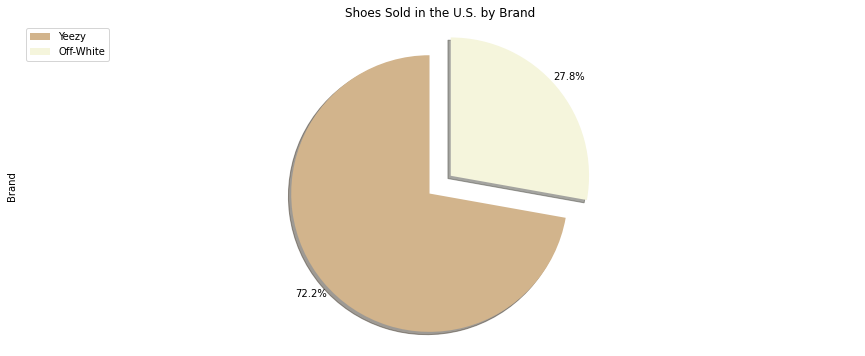

In [12]:
# Pie chart that displays the proportion of shoes sold in the U.S. grouped by brand
colors_list = ['tan', 'beige']
explode_list = [0.1, 0.1]


df_CO.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            shadow=True,
                            labels=None,
                            pctdistance=1.12, 
                            colors = colors_list,
                            explode = explode_list, 
                            )
plt.title('Shoes Sold in the U.S. by Brand')
plt.axis('equal') 

plt.legend(labels= ['Yeezy', 'Off-White'], loc= 'upper left')

plt.show()

In [13]:
# Revnue earned from shoes sales in the U.S. grouped by brand
df_Rev = df_shoes.groupby('Brand')['Sale Price'].sum()
print(df_Rev)

Brand
 Yeezy       2.598067e+07
Off-White    1.866315e+07
Name: Sale Price, dtype: float64


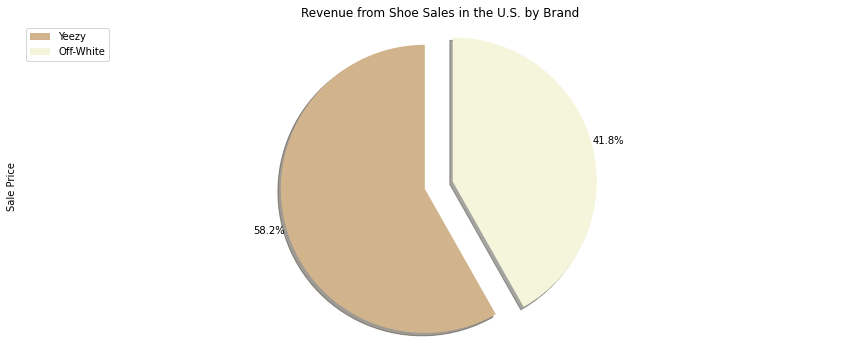

In [14]:
# Pie chart that displays the proportion revenue earned from shoes sales in the U.S. grouped by brand
colors_list = ['tan', 'beige']
explode_list = [0.1, 0.1]


df_Rev.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            shadow=True,
                            labels=None,
                            pctdistance=1.12, 
                            colors = colors_list,
                            explode = explode_list, 
                            )
plt.title('Revenue from Shoe Sales in the U.S. by Brand')
plt.axis('equal') 

plt.legend(labels= ['Yeezy', 'Off-White'], loc= 'upper left')

plt.show()

In [15]:
# The amount of shoes sold in Georgia grouped by Brand
df_GS = df_GA.groupby('Brand')['Brand'].count()
print(df_GS)

Brand
 Yeezy       1318
Off-White     528
Name: Brand, dtype: int64


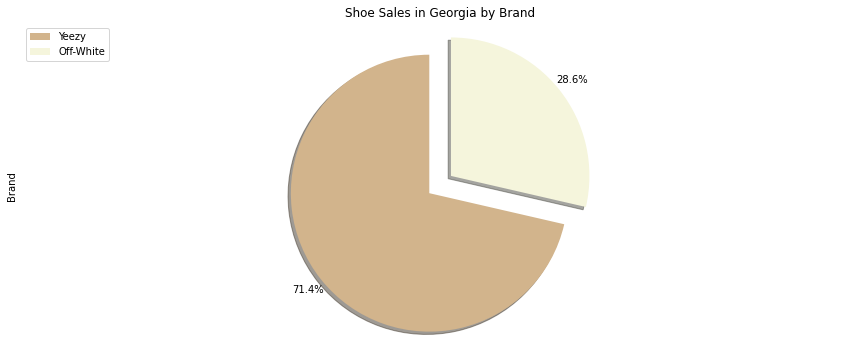

In [16]:
# Pie chart that displays the proportion of shoes sold in Georgia grouped by brand
colors_list = ['tan', 'beige']
explode_list = [0.1, 0.1]


df_GS.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            shadow=True,
                            labels=None,
                            pctdistance=1.12, 
                            colors = colors_list,
                            explode = explode_list, 
                            )
plt.title('Shoe Sales in Georgia by Brand')
plt.axis('equal') 

plt.legend(labels= ['Yeezy', 'Off-White'], loc= 'upper left')

plt.show()

In [17]:
# Revnue earned from shoes sales in Georgia grouped by brand
df_GR = df_GA.groupby('Brand')['Sale Price'].sum()
print(df_GR)

Brand
 Yeezy       454555.3586
Off-White    340594.0000
Name: Sale Price, dtype: float64


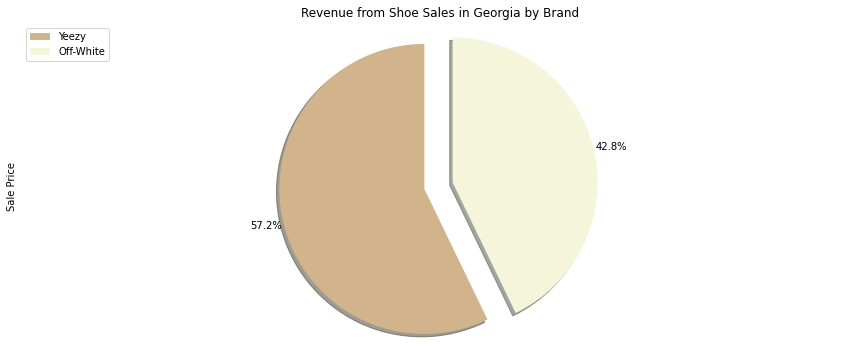

In [18]:
# Pie chart that displays the proportion revenue earned from shoes sales in Georgia grouped by brand
colors_list = ['tan', 'beige']
explode_list = [0.1, 0.1]


df_GR.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', 
                            startangle=90, 
                            shadow=True,
                            labels=None,
                            pctdistance=1.12, 
                            colors = colors_list,
                            explode = explode_list, 
                            )
plt.title('Revenue from Shoe Sales in Georgia by Brand')
plt.axis('equal') 

plt.legend(labels= ['Yeezy', 'Off-White'], loc= 'upper left')

plt.show()

# Pie Chart: Displays the proportions of shoe sizes for the shoe that generated the most revenue

In [ ]:
# Group all the shoes by their sneaker name and calculate the sum of their sales (Sale Price)
df_MAX = df_shoes.groupby('Sneaker Name')['Sale Price'].sum()
print(df_MAX)

Sneaker Name
Adidas-Yeezy-Boost-350-Low-Moonrock                  9.967100e+04
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                7.080600e+04
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015         8.503400e+04
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016         1.200770e+05
Adidas-Yeezy-Boost-350-Low-Turtledove                1.041530e+05
Adidas-Yeezy-Boost-350-Low-V2-Beluga                 3.927750e+05
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                4.162570e+06
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  3.523434e+06
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper          1.477420e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-Green           1.220690e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-Red             2.832020e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017        7.793710e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-White           4.461340e+05
Adidas-Yeezy-Boost-350-V2-Cream-White                2.626385e+06
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow         1.895909e+

In [ ]:
# Sort values into descending order to find shoe that generated the most revenue
df_MAX.sort_values(ascending=True)

Sneaker Name
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100    3.024100e+04
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                7.080600e+04
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015         8.503400e+04
Adidas-Yeezy-Boost-350-Low-Moonrock                  9.967100e+04
Adidas-Yeezy-Boost-350-Low-Turtledove                1.041530e+05
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016         1.200770e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-Green           1.220690e+05
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper          1.477420e+05
Nike-Zoom-Fly-Mercurial-Off-White-Total-Orange       1.888720e+05
Nike-Air-Max-97-Off-White-Elemental-Rose-Queen       1.930570e+05
Nike-Air-Max-97-Off-White-Black                      1.942370e+05
Nike-Blazer-Mid-Off-White-Wolf-Grey                  2.260290e+05
Nike-Zoom-Fly-Mercurial-Off-White-Black              2.284160e+05
Nike-Zoom-Fly-Off-White                              2.326450e+05
Nike-React-Hyperdunk-2017-Flyknit-Off-White          2.395540e+

In [ ]:
# Select all the records of the shoe that generated the most revenue
df_V = df_shoes[df_shoes['Sneaker Name'] == 'Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100']
df_V

Order Date      Brand  \
1397  2017-11-06  Off-White   
1448  2017-11-08  Off-White   
1494  2017-11-09  Off-White   
1543  2017-11-10  Off-White   
1780  2017-11-14  Off-White   
1924  2017-11-16  Off-White   
2020  2017-11-17  Off-White   
2021  2017-11-17  Off-White   
2134  2017-11-18  Off-White   
2261  2017-11-19  Off-White   
2395  2017-11-20  Off-White   
2396  2017-11-20  Off-White   
2563  2017-11-21  Off-White   
4958  2017-11-28  Off-White   
5903  2017-11-30  Off-White   
6205  2017-12-01  Off-White   
6206  2017-12-01  Off-White   
6459  2017-12-02  Off-White   
7192  2017-12-05  Off-White   
8080  2017-12-09  Off-White   
8269  2017-12-10  Off-White   
8829  2017-12-13  Off-White   
10831 2017-12-19  Off-White   
14216 2018-01-06  Off-White   
17225 2018-02-03  Off-White   
20226 2018-03-09  Off-White   
20309 2018-03-10  Off-White   
20473 2018-03-12  Off-White   
20701 2018-03-15  Off-White   
20945 2018-03-17  Off-White   
26279 2018-05-22  Off-White   

                                            Sneaker Name  Sale Price  \
1397   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       850.0   
1448   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       775.0   
1494   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1100.0   
1543   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       910.0   
1780   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       841.0   
1924   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       950.0   
2020   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       870.0   
2021   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       785.0   
2134   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       770.0   
2261   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       710.0   
2395   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       725.0   
2396   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       995.0   
2563   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       920.0   
4958   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       965.0   
5903   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1040.0   
6205   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       960.0   
6206   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       745.0   
6459   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       860.0   
7192   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       775.0   
8080   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       925.0   
8269   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       720.0   
8829   Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       950.0   
10831  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       950.0   
14216  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1140.0   
17225  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1110.0   
20226  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1500.0   
20309  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1500.0   
20473  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1125.0   
20701  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1375.0   
20945  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1250.0   
26279  Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1150.0   

       Retail Price Release Date  Shoe Size  Buyer Region  
1397            150   2017-11-04       10.0    California  
1448            150   2017-11-04       12.0       Florida  
1494            150   2017-11-04        9.5      Colorado  
1543            150   2017-11-04       10.0         Texas  
1780            150   2017-11-04       10.5      New York  
1924            150   2017-11-04        9.0         Maine  
2020            150   2017-11-04       11.0    California  
2021            150   2017-11-04        7.5    California  
2134            150   2017-11-04        4.0  Pennsylvania  
2261            150   2017-11-04       11.0      Delaware  
2395            150   2017-11-04        6.5     

In [ ]:
# Select Sneaker Name as the index
df_V.set_index('Sneaker Name')

Order Date      Brand  \
Sneaker Name                                                              
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-06  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-08  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-09  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-10  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-14  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-16  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-17  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-17  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-18  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-19  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-20  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-20  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-21  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-28  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-11-30  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-01  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-01  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-02  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-05  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-09  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-10  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-13  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2017-12-19  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-01-06  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-02-03  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-03-09  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-03-10  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-03-12  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-03-15  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-03-17  Off-White   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100 2018-05-22  Off-White   

                                                   Sale Price  Retail Price  \
Sneaker Name                                                                  
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       850.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       775.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1100.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       910.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       841.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       950.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       870.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       785.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       770.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       710.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       725.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       995.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       920.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       965.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100      1040.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       960.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       745.0           150   
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100       860.0           1

In [ ]:
# Selecting the Shoe Size column 
df_SS = df_V['Shoe Size']
df_SS

1397     10.0
1448     12.0
1494      9.5
1543     10.0
1780     10.5
1924      9.0
2020     11.0
2021      7.5
2134      4.0
2261     11.0
2395      6.5
2396     10.5
2563     10.0
4958     10.0
5903      8.5
6205      9.0
6206     10.5
6459     11.0
7192     10.5
8080      5.0
8269     10.5
8829     11.5
10831    10.0
14216     9.5
17225    10.0
20226    12.0
20309     9.0
20473    10.0
20701    10.0
20945    11.0
26279     7.0
Name: Shoe Size, dtype: float64

In [ ]:
# Dropping duplicates of shoes that are the same size
df_SS = df_SS.drop_duplicates()
df_SS

1397     10.0
1448     12.0
1494      9.5
1780     10.5
1924      9.0
2020     11.0
2021      7.5
2134      4.0
2395      6.5
5903      8.5
8080      5.0
8829     11.5
26279     7.0
Name: Shoe Size, dtype: float64

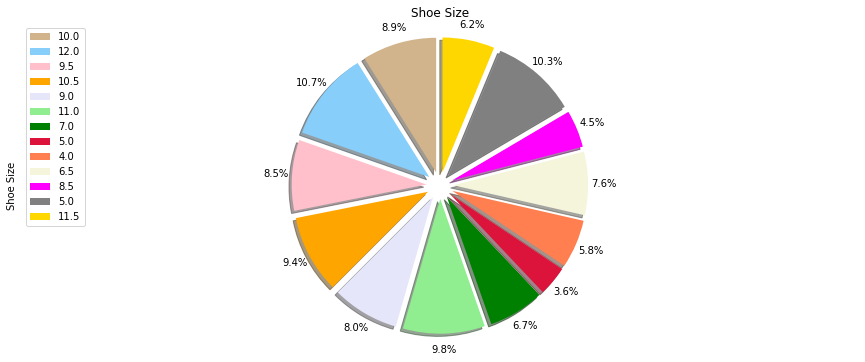

In [ ]:
# Pie chart that displays the shoe size percentages for the shoe that generates the most revenue
colors_list = ['tan', 'lightskyblue', 'pink', 'orange', 'lavender', 'lightgreen', 'green', 'crimson', 'coral', 'beige', 'magenta', 'grey', 'gold']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]



df_SS.plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', # add percentages
                            startangle=90, # start angle 90 (Africa)
                            shadow=True,
                            labels=None,
                            pctdistance=1.12, # ratio between center of each pie slice and percentage location
                            colors = colors_list,
                            explode = explode_list, # 'explode' lowest three continents
                            )
plt.title('Shoe Size')
plt.axis('equal') # sets the pie chart to look like a circle

plt.legend(labels=[10.0, 12.0, 9.5, 10.5, 9.0, 11.0, 7.0, 5.0, 4.0, 6.5, 8.5, 5.0, 11.5, 7.0], loc= 'upper left')

plt.show()

# Bar chart

In [19]:
# The amount of revenue each shoe has generated in the Georgia region (Sale Price)
df_SA = df_GA.groupby('Sneaker Name')['Sale Price'].sum()
print(df_SA)

Sneaker Name
Adidas-Yeezy-Boost-350-Low-V2-Beluga                  7816.0000
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                71597.0000
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  66138.0000
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper           2115.0000
Adidas-Yeezy-Boost-350-V2-Core-Black-Green             699.0000
Adidas-Yeezy-Boost-350-V2-Core-Black-Red              4725.0000
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         7357.0000
Adidas-Yeezy-Boost-350-V2-Core-Black-White            4921.0000
Adidas-Yeezy-Boost-350-V2-Cream-White                54671.3586
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow         49785.0000
Adidas-Yeezy-Boost-350-V2-Sesame                     29654.0000
Adidas-Yeezy-Boost-350-V2-Zebra                      61878.0000
Air-Jordan-1-Retro-High-Off-White-Chicago            35637.0000
Air-Jordan-1-Retro-High-Off-White-University-Blue    53202.0000
Air-Jordan-1-Retro-High-Off-White-White               5375.0000
Nike-Air-Force-1-Low-Off-Wh

Text(0.5, 0, 'Sneaker')

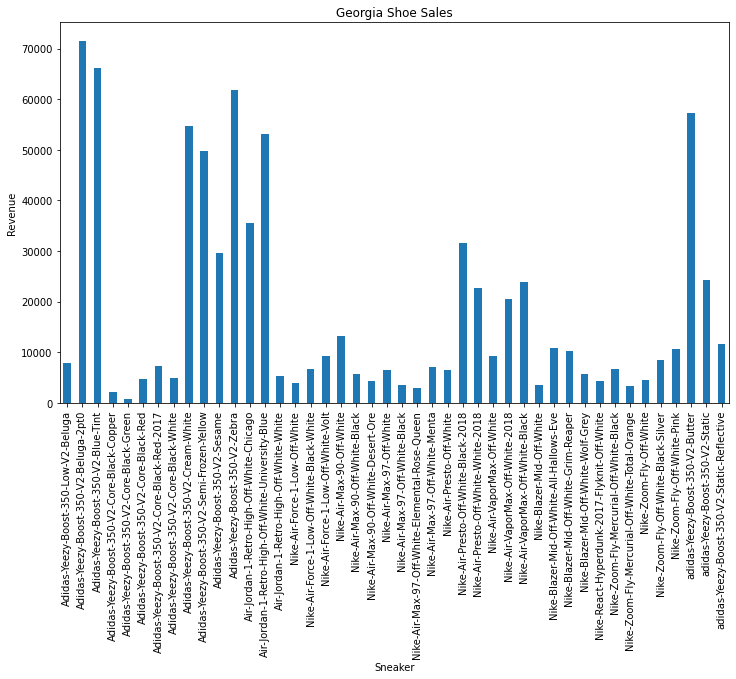

In [ ]:
# Displays which shoes generated the most revenue in the Georgia region (Sale Price)
df_SA.plot(kind='bar',figsize=(12,7))
plt.title('Georgia Shoe Sales')
plt.ylabel('Revenue')
plt.xlabel('Sneaker')

# Scattter plot

In [ ]:
# Displays which shoes were sold at a certain price based on shoe size and grouped by color
px.scatter(df_shoes, x='Sale Price', y='Shoe Size', hover_name='Sneaker Name', color = 'Brand', height=500)

In [ ]:
# Displays which shoes were sold at a certain price based on shoe size and grouped by color in the Georgia region
px.scatter(df_GA, x='Sale Price', y='Shoe Size', hover_name='Sneaker Name', color = 'Brand', height=500)